# Which brand should you consider first for a used car on eBay Kleinanzeigen?

Cars are well-known as having a high depreciation rate. Therefore, purchasing used car can usually be economically more favorable for many people. *eBay Kleinanzeigen* is a classfied advertising section of the German eBay website. Here I will work with [a dataset](https://www.kaggle.com/orgesleka/used-cars-database/data) which was orinigally scraped from *eBay Kleinanzeigen*, for the used car sell information. **My goal is to build a model that predicts the price of the used car**.

## Data Cleaning
The data cleaning involves two main stages:

The first stage is an overall dataset cleaning, where I will drop the unwanted data (data that is not useful for my analysis), and fill the missing data with proper values.

The second stage is the cleaning for numerical columns, where I will remove outliers and redefine the boundaries of the numerical values in a reasonable way.

## Overall Dataset Cleaning

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
autos = pd.read_csv('autos.csv', encoding = 'Latin-1')

In [330]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


It can be noticed that the dataset uses camelcase in column name intead of the conventional snakecase in Python. To make my later analysis easier, I am going to change all the column names into snakecase.

In [331]:
# Change column names
autos.columns = ['date_crawled','name','seller','offer_type','price','abtest','vehicle_type','registration_year','gearbox','power_ps','model','kilometer','registration_month','fuel_type','brand','unrepaired_damage','date_created','n_of_pictures','postal_code','date_last_seen']

As we are trying to predict the used car price, *name*, *date_crawled* (date in which the data was obtained), *date_created* (date in which the advertisement was created) , *postal_code*, *date_last_seen*(date in which the advertisement was seen last), and *n_of_pictures* columns should not be very useful, as they are not relevant to the cars' properties. So let's drop these columns.

In [332]:
autos = autos.drop(columns = ['name', 'date_crawled', 'date_created', 'postal_code', 'date_last_seen', 'n_of_pictures'])

## Missing Values And Duplicates

In [333]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 14 columns):
seller                371528 non-null object
offer_type            371528 non-null object
price                 371528 non-null int64
abtest                371528 non-null object
vehicle_type          333659 non-null object
registration_year     371528 non-null int64
gearbox               351319 non-null object
power_ps              371528 non-null int64
model                 351044 non-null object
kilometer             371528 non-null int64
registration_month    371528 non-null int64
fuel_type             338142 non-null object
brand                 371528 non-null object
unrepaired_damage     299468 non-null object
dtypes: int64(5), object(9)
memory usage: 39.7+ MB


We can also notice that the following columns contain missing values:
- vehicle_type
- gearbox
- model
- fuel_type
- unrepaired_damage

These are categorical data, so we can either fill the missing values with the most frequent values, or directly drop them. Let's take a closer look at each column.

### Vehicle Type

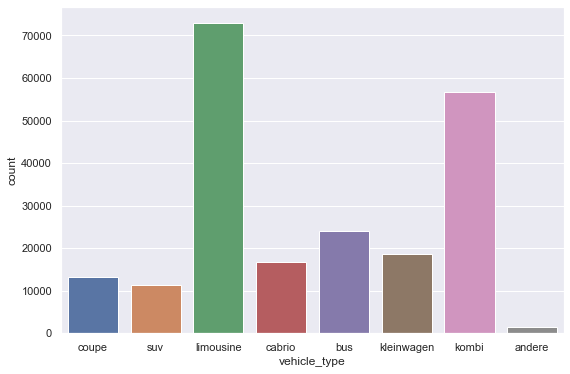

In [327]:
fig = plt.figure(figsize=(9, 6))
sns.set(style="darkgrid")
sns.countplot(x='vehicle_type', data=autos)
plt.show()

As can be seen from the figure, limousine has the highest counts compared to others. **We can fill all missing values by using "limousine". However, I noticed that *brand* column does not have any missing values. So we can actually fill the missing vehicle types of a brand by the most frequent vehicle type in the same brand.** This should be more accurate as compared to simply filling all missing values with one value. For example, car brand like Jeep will more likely to have "SUV" as the most frequent vehicle type as compared to "limousine". Let's find the most frequent vehicle type in each brand:

In [346]:
unique_brands = autos.brand.unique()
match = {}

for brand in unique_brands:
    match[brand] = autos.loc[autos.brand==brand, 'vehicle_type'].value_counts(ascending=False).index[0]
for brand in unique_brands:
    autos.loc[autos.brand==brand, 'vehicle_type'] = autos.loc[autos.brand==brand, 'vehicle_type'].fillna(value=match[brand])

In [347]:
match

{'volkswagen': 'limousine',
 'audi': 'limousine',
 'jeep': 'suv',
 'skoda': 'kombi',
 'bmw': 'limousine',
 'peugeot': 'kleinwagen',
 'ford': 'kleinwagen',
 'mazda': 'limousine',
 'nissan': 'kleinwagen',
 'renault': 'kleinwagen',
 'mercedes_benz': 'limousine',
 'opel': 'kleinwagen',
 'seat': 'kleinwagen',
 'citroen': 'kleinwagen',
 'honda': 'limousine',
 'fiat': 'kleinwagen',
 'mini': 'kleinwagen',
 'smart': 'kleinwagen',
 'hyundai': 'kleinwagen',
 'sonstige_autos': 'limousine',
 'alfa_romeo': 'limousine',
 'subaru': 'kombi',
 'volvo': 'kombi',
 'mitsubishi': 'limousine',
 'kia': 'suv',
 'suzuki': 'kleinwagen',
 'lancia': 'kleinwagen',
 'porsche': 'cabrio',
 'toyota': 'kleinwagen',
 'chevrolet': 'kleinwagen',
 'dacia': 'kombi',
 'daihatsu': 'kleinwagen',
 'trabant': 'limousine',
 'saab': 'limousine',
 'chrysler': 'bus',
 'jaguar': 'limousine',
 'daewoo': 'kleinwagen',
 'rover': 'limousine',
 'land_rover': 'suv',
 'lada': 'suv'}

As expected, some companies such as Jeep and Land Rover have "SUV" as the most frequent vehicle type instead of "limousine".

### Gearbox
Let's use the same principle to fill the missing values for *gearbox* column.

In [348]:
unique_brands = autos.brand.unique()
match = {}

for brand in unique_brands:
    match[brand] = autos.loc[autos.brand==brand, 'gearbox'].value_counts(ascending=False).index[0]
for brand in unique_brands:
    autos.loc[autos.brand==brand, 'gearbox'] = autos.loc[autos.brand==brand, 'gearbox'].fillna(value=match[brand])

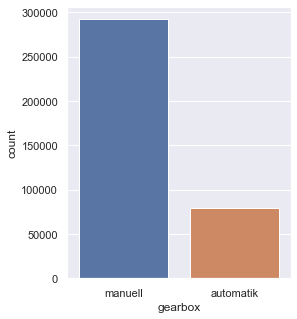

In [349]:
fig = plt.figure(figsize=(4, 5))
sns.countplot(x='gearbox', data=autos)
plt.show()

In [350]:
match

{'volkswagen': 'manuell',
 'audi': 'manuell',
 'jeep': 'automatik',
 'skoda': 'manuell',
 'bmw': 'manuell',
 'peugeot': 'manuell',
 'ford': 'manuell',
 'mazda': 'manuell',
 'nissan': 'manuell',
 'renault': 'manuell',
 'mercedes_benz': 'automatik',
 'opel': 'manuell',
 'seat': 'manuell',
 'citroen': 'manuell',
 'honda': 'manuell',
 'fiat': 'manuell',
 'mini': 'manuell',
 'smart': 'automatik',
 'hyundai': 'manuell',
 'sonstige_autos': 'manuell',
 'alfa_romeo': 'manuell',
 'subaru': 'manuell',
 'volvo': 'manuell',
 'mitsubishi': 'manuell',
 'kia': 'manuell',
 'suzuki': 'manuell',
 'lancia': 'manuell',
 'porsche': 'manuell',
 'toyota': 'manuell',
 'chevrolet': 'manuell',
 'dacia': 'manuell',
 'daihatsu': 'manuell',
 'trabant': 'manuell',
 'saab': 'manuell',
 'chrysler': 'automatik',
 'jaguar': 'automatik',
 'daewoo': 'manuell',
 'rover': 'manuell',
 'land_rover': 'manuell',
 'lada': 'manuell'}

Again, we can see that even though "manuell" (manual) has much higher counts compared to "automatik" (automatic), some companies such as Mercedes Benz and Smart do have higher counts in automatic. 

### Model

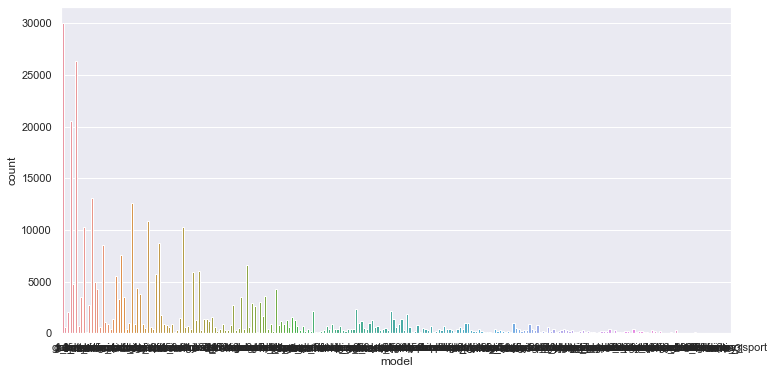

In [352]:
fig = plt.figure(figsize=(12, 6))
sns.countplot(x='model', data=autos)
plt.show()

Our plot cannot fit all models' name on the x-axis. This is because every brand has their own models, and there are too many different models in the dataset. Models are too specific for our price-prediction purpose, so I just drop this column.

In [353]:
autos = autos.drop(columns=['model'])

#### Fuel Type
Similarly, let's fill the fuel type missing values by the most frequent value in each brand.

In [354]:
unique_brands = autos.brand.unique()
match = {}

for brand in unique_brands:
    match[brand] = autos.loc[autos.brand==brand, 'fuel_type'].value_counts(ascending=False).index[0]
for brand in unique_brands:
    autos.loc[autos.brand==brand, 'fuel_type'] = autos.loc[autos.brand==brand, 'fuel_type'].fillna(value=match[brand])

### Unrepaired Damage
Unrepaired damage should not be specific to brands. So let's just fill the missing values by the most frequent value. In this case, it'll be "nein" (No). Also, it is more likely that people did not fill this section because there was no unrepaired damage.

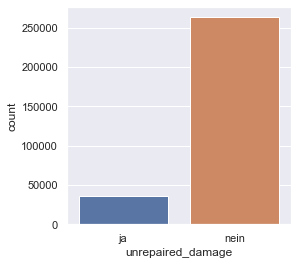

In [356]:
fig = plt.figure(figsize=(4, 4))
sns.countplot(x='unrepaired_damage', data=autos)
plt.show()

In [357]:
autos['unrepaired_damage'] = autos['unrepaired_damage'].fillna(value='nein')

In [358]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 13 columns):
seller                371528 non-null object
offer_type            371528 non-null object
price                 371528 non-null int64
abtest                371528 non-null object
vehicle_type          371528 non-null object
registration_year     371528 non-null int64
gearbox               371528 non-null object
power_ps              371528 non-null int64
kilometer             371528 non-null int64
registration_month    371528 non-null int64
fuel_type             371528 non-null object
brand                 371528 non-null object
unrepaired_damage     371528 non-null object
dtypes: int64(5), object(8)
memory usage: 36.8+ MB


### Duplicates
Let's now check if there is any duplicates:

In [359]:
autos.duplicated().value_counts()

False    347226
True      24302
dtype: int64

We have 24302 duplicated values. Let's remove them.

In [360]:
autos = autos.drop_duplicates()

## Numerical Column Cleaning

We have cleaned the missing values and dropped the duplicates. Now let's check if there is any further cleaning required for the numerical columns:

In [362]:
autos.describe()

,price,registration_year,power_ps,kilometer,registration_month
count,3.472260e+05,347226.000000,347226.000000,347226.000000,347226.000000
mean,1.816012e+04,2004.609341,116.381832,125417.753855,5.744627
std,3.711387e+06,94.528902,197.822106,40202.422787,3.700059
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000
25%,1.150000e+03,1999.000000,71.000000,100000.000000,3.000000
50%,2.990000e+03,2003.000000,105.000000,150000.000000,6.000000
75%,7.250000e+03,2008.000000,150.000000,150000.000000,9.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000


Several interesting points can be noticed:
- *price_dollar* column has a max price at 2.14e9 dollars, and a min price at 0 dollar. These are definitely not normal.
- *registration_year* column has a max year of 9999, and a min year of 1000. These also do not make sense.
- *power_ps* column also has unusual min and max values.

Let's investigae the above three abnormal columns in more details.

### Price

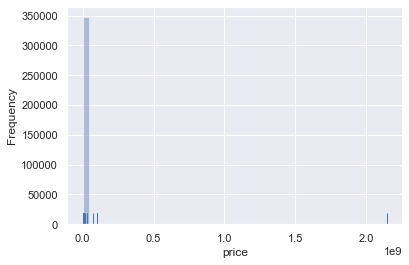

In [363]:
ax = sns.distplot(autos['price'], kde=False, rug=True)
ax.set_ylabel('Frequency')
plt.show()

The long thick bar indicates the frequency of the prices, while the short thin bars indicate where the prices locate at. As can be seen from the graph, several prices are way above \\$100,000 and caused the histogram compressed and we are unable to see any distribution from the graph. These large prices are likely outliers. Let's take a closer look at the statistics of the column:

In [364]:
autos['price'].describe()

count    3.472260e+05
mean     1.816012e+04
std      3.711387e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.990000e+03
75%      7.250000e+03
max      2.147484e+09
Name: price, dtype: float64

It is noticed that the min price is 0 dollar, and the max price is 2.14e9 dollars. It is not normal to sell a car with a price of 0 dollar or higher than 500,000 dollars (the most luxurious cars in the world, like [Rolls Royce Phantom](https://www.rolls-roycemotorcars.com/en_GB/showroom/phantom.html) have price of 500,000 dollars. and the price is for brand new cars!). So, I need to set a proper price range for my analysis.

First, let's find the [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range) (the difference between the third quartile and the first quartile). Based on the description above, the first quartile is 1150 dollars, and the third quartile is 7200 dollars.

In [365]:
# Find the interquartile range
interq_price = 7250 - 1150

The [major outliers](https://en.wikipedia.org/wiki/Outlier) are outside of the "outer fences". The upper bound of the "outer fences" is three interquartile range above the third quartile; the lower bound of the "outer fences" is three interquartile range below the first quartile.

In [366]:
# Find the outer fences
up_price = 7200 + 3 * interq_price
low_price = 1150 - 3 * interq_price
print("The upper bound is {num}".format(num=up_price))
print("The lower bound is {num}".format(num=low_price))

The upper bound is 25500
The lower bound is -17150


The lower bound of the "outer fences" does not make sense as it is a negative value. However, essentially it indicates that all values below the first quartile is not considered outlier. Still, based on the common sense, nobody should sell a call with 0 dollar. So I take all values between 0 dollar and 25667 dollars, excluding 0 dollar for my analysis.

In [367]:
autos = autos.loc[autos['price'].between(0.1, 25550)]

Let's see how the price distribution looks like now.

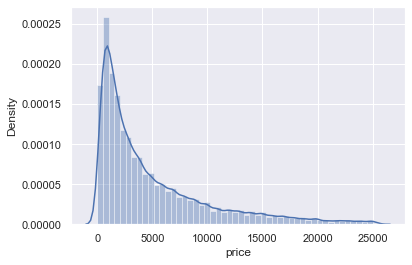

In [368]:
ax = sns.distplot(autos['price'])
ax.set_ylabel('Density')
plt.show()

The graph now looks much better as we can clearly see the distribution of the prices. Even though it is not perfectly normal distributed, it has been greatly improved. The right-skew is caused by a small number of expensive cars that are over \\$15000. However, since prices of above $15000 for cars are reasonable, I do not want to further remove the data.

### Kilometer

Now, let's examine the *kilometer* column.

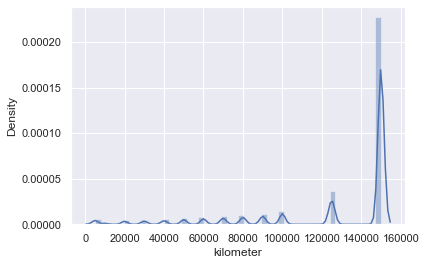

In [369]:
ax = sns.distplot(autos['kilometer'])
ax.set_ylabel('Density')
plt.show()

The graph above tells us that the values in *kilometer* column are discrete, with most of the values at around 150,000 km. As every car should have different odometer reading, the discontinuous odometer reading indicates that the values are recorded by estimations. For example, it is possible that all odometer readings that are between 125,000 km and 150,000 km are recorded as 125,000 km. What is more interesting, how come no car has odometer reading above 150,000 km? To figure out the reason, let's take a closer look at the column data.

In [370]:
autos['kilometer'].describe()

count    328662.000000
mean     127169.143375
std       38473.327789
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

It is oberserved that the median value is equal to the max value, which means that over half of cars have odometer equal to 150,000 km. It is rare to see most of the cars having exactly the same odometer. I can think of two potential explainations: 
1. The cars with higher than 150,000 km are not included in the data set.
2. The odometers higher than 150,000 km are considered as 150,000 km.

### Registration Year

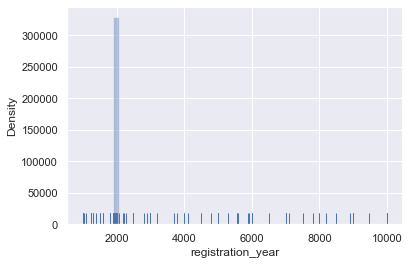

In [371]:
ax = sns.distplot(autos['registration_year'], kde=False, rug=True)
ax.set_ylabel('Density')
plt.show()

The graph tells us that most of the data lies close to 2000. This makes sense as we are now in the 21st century. However, there are years that are much smaller than 2000 (even before the time [when the car was invented (1886)](https://en.wikipedia.org/wiki/Car#:~:text=The%20year%201886%20is%20regarded,by%20the%20Ford%20Motor%20Company)), and years that are even larger than the current year. So let's clean them out.

In [372]:
autos = autos.loc[autos['registration_year'].between(1886,2019)]

Now let's look at our histogram for the registration year:

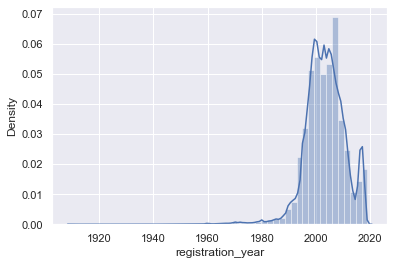

In [373]:
ax = sns.distplot(autos['registration_year'])
ax.set_ylabel('Density')
plt.show()

Much better! We can notice that most the values are between year 1990 and year 2019. It is reasonable to drop data with registration year before 1980, as most of the people won't even look for these old cars.

In [374]:
autos = autos.loc[autos['registration_year'].between(1990,2019)]

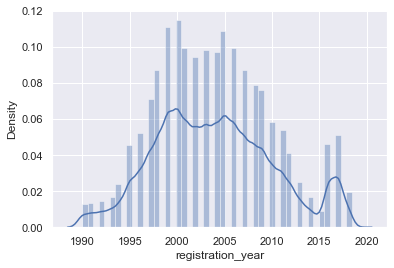

In [375]:
ax = sns.distplot(autos['registration_year'])
ax.set_ylabel('Density')
plt.show()

Now the graph is perfect!

### Power

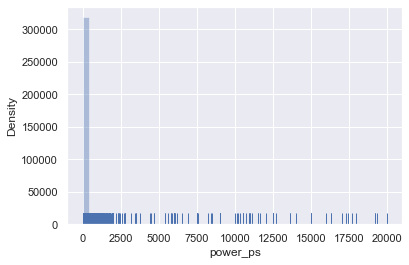

In [376]:
ax = sns.distplot(autos['power_ps'], kde=False, rug=True)
ax.set_ylabel('Density')
plt.show()

Again, similar to the price and registration year, we see a huge variation on power values. This is an indication for outliers. So let's take a closer look.

In [377]:
autos['power_ps'].describe()

count    319696.000000
mean        113.970269
std         191.960125
min           0.000000
25%          73.000000
50%         105.000000
75%         144.000000
max       20000.000000
Name: power_ps, dtype: float64

Apparently, a power of 17700 or 0 does not make sense. Let's use the "outer fences" method first to clean our data.

In [379]:
# Filter out the outliers in "power_ps" column
interq_power = 143 - 71
up_power = 144 + 3 * interq_power
low_power = 73 - 3 * interq_power
print("The upper bound is {num}".format(num=up_power))
print("The lower bound is {num}".format(num=low_power))

The upper bound is 360
The lower bound is -143


A negative power value cannot be used. So I need to find the lowest power value, but not power of 0. Let's take a look at what low power values we have in the dataset:

In [380]:
autos['power_ps'].value_counts().sort_index(ascending=True).head(10)

0    31737
1       23
2        9
3        7
4       25
5       95
6       10
7       10
8        6
9        3
Name: power_ps, dtype: int64

Suprisingly, there are many cars with power less than 10. It's quite rare to see any cars with such low power today, so my first impression is that they are very old cars. Let's verify if it is truely the case.

In [381]:
autos.loc[autos['power_ps']==1]

,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,kilometer,registration_month,fuel_type,brand,unrepaired_damage
21205,privat,Angebot,4999,test,limousine,2003,manuell,1,150000,12,diesel,mercedes_benz,nein
23310,privat,Angebot,275,test,andere,2010,automatik,1,5000,1,andere,sonstige_autos,nein
34798,privat,Angebot,3900,control,cabrio,2004,automatik,1,90000,5,benzin,smart,nein
75121,privat,Angebot,6000,test,andere,2009,manuell,1,5000,1,andere,sonstige_autos,nein
77437,privat,Angebot,490,control,limousine,2002,manuell,1,100000,11,benzin,chrysler,nein
98946,privat,Angebot,300,control,cabrio,1997,manuell,1,5000,4,diesel,volkswagen,ja
111996,privat,Angebot,650,control,kleinwagen,2016,manuell,1,150000,8,benzin,opel,nein
129498,privat,Angebot,1400,control,andere,1999,manuell,1,5000,0,benzin,sonstige_autos,nein
142267,privat,Angebot,799,test,limousine,1997,manuell,1,150000,4,benzin,renault,nein
142298,privat,Angebot,1,control,limousine,2002,manuell,1,5000,7,benzin,daewoo,nein


The chart shows that a 2017 BMW has a power of 1 PS. This does not make sense as [the least powerful car](https://www.autoguide.com/auto-news/2017/07/top-10-cars-with-the-least-horsepower-in-2017.html) in 2017 that's available today has a power of 78 HP (79 PS). So I consider 79 PS as my lower bound for power. 

In [382]:
autos = autos.loc[autos['power_ps'].between(79,359)]

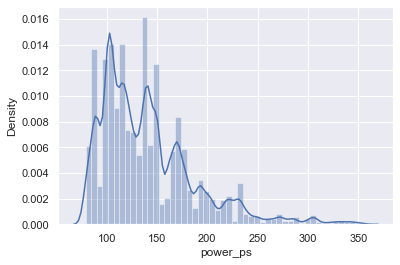

In [383]:
ax = sns.distplot(autos['power_ps'])
ax.set_ylabel('Density')
plt.show()

## Correlations
We've completed the data cleaning. Let's now explore what variables are important for our analysis, and whether there are collinearities between variables. First, let's visualize the categorical columns as we haven't done it before.

**Seller:**

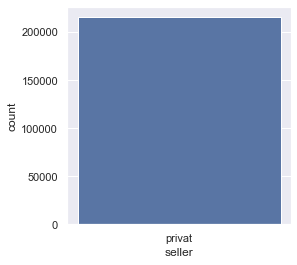

In [384]:
fig = plt.figure(figsize=(4, 4))
sns.countplot(x='seller', data=autos)
plt.show()

All sellers are "privat" (private) in our final dataset. This column is definitely not useful for our prediction. Let's drop it.

In [385]:
autos = autos.drop(columns=['seller'])

**Offer_type:**

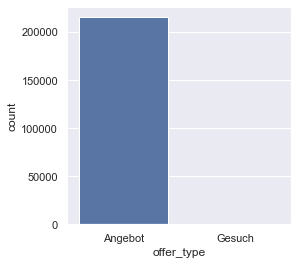

In [386]:
fig = plt.figure(figsize=(4, 4))
sns.countplot(x='offer_type', data=autos)
plt.show()

Almost offer_types are "Angebot" in our final dataset. Let's drop it.

In [387]:
autos = autos.drop(columns=['offer_type'])

**abtest:**

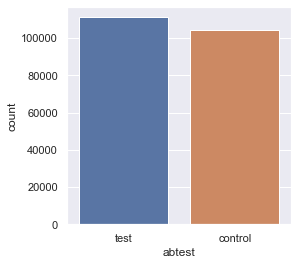

In [388]:
fig = plt.figure(figsize=(4, 4))
sns.countplot(x='abtest', data=autos)
plt.show()

**Brand:**

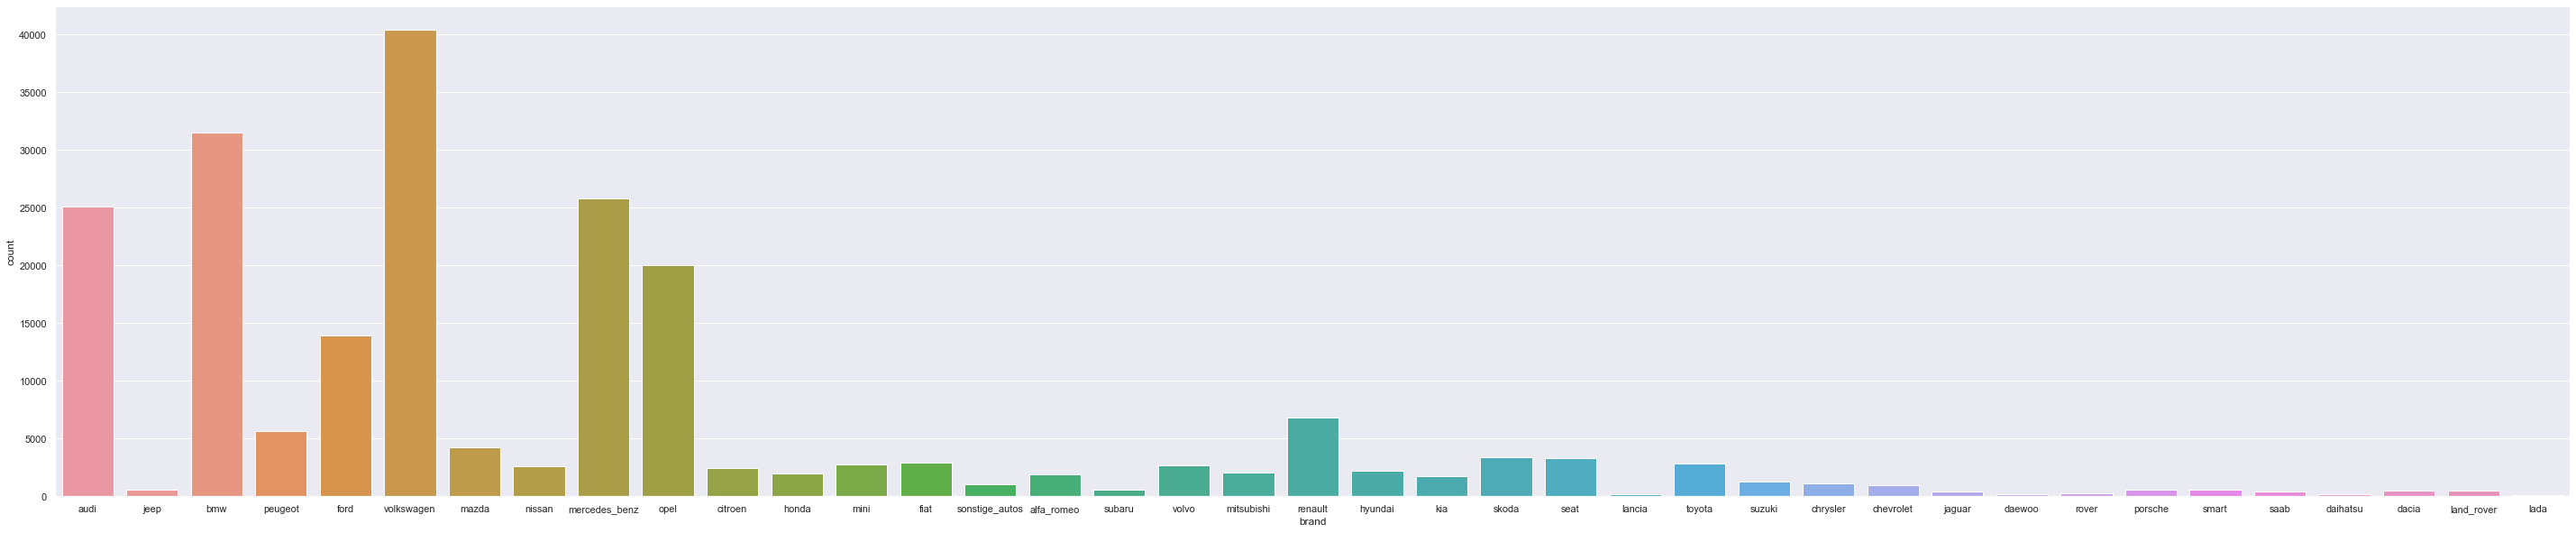

In [458]:
fig = plt.figure(figsize=(50, 10))
sns.countplot(x='brand', data=autos)
plt.show()

## Model Building

### Random Forest

One hot encoding for categorical columns:

In [391]:
autos_one_hot = pd.get_dummies(autos, columns=['abtest', 'vehicle_type', 'gearbox', 'fuel_type', 'brand', 'unrepaired_damage'])

Here is our parameter list:

In [401]:
autos_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215548 entries, 1 to 371526
Data columns (total 65 columns):
price                      215548 non-null int64
registration_year          215548 non-null int64
power_ps                   215548 non-null int64
kilometer                  215548 non-null int64
registration_month         215548 non-null int64
abtest_control             215548 non-null uint8
abtest_test                215548 non-null uint8
vehicle_type_andere        215548 non-null uint8
vehicle_type_bus           215548 non-null uint8
vehicle_type_cabrio        215548 non-null uint8
vehicle_type_coupe         215548 non-null uint8
vehicle_type_kleinwagen    215548 non-null uint8
vehicle_type_kombi         215548 non-null uint8
vehicle_type_limousine     215548 non-null uint8
vehicle_type_suv           215548 non-null uint8
gearbox_automatik          215548 non-null uint8
gearbox_manuell            215548 non-null uint8
fuel_type_andere           215548 non-null uint8
fuel_ty

In [393]:
X = autos_one_hot.iloc[:, 1:]
y = autos_one_hot.iloc[:, 0]

In [394]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [399]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8627407208357178

The accuracy is 86.2%, which is very good! Let's try to further improve the accuracy through hyper-parameter tuning:

In [397]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10, 50, 100], 
              'max_depth': [3, 5, 7, None], 
              'min_samples_split': [2, 3], 
              'min_samples_leaf': [1, 2, 3]}
gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, refit=True, n_jobs=-1)
gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)
rf_best = gs.best_estimator_

0.8753490384330624
{'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


Let's check the feature importances (there are too many features to show properly in a graph, so I store them in a dataframe):

In [414]:
feature_importance = {}
for i in range(len(X.columns)):
    feature_importance[X.columns[i]] = rf_best.feature_importances_[i]
feature_importance = pd.DataFrame(feature_importance, index=[0])
feature_importance

,registration_year,power_ps,kilometer,registration_month,abtest_control,abtest_test,vehicle_type_andere,vehicle_type_bus,vehicle_type_cabrio,vehicle_type_coupe,...,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_volkswagen,brand_volvo,unrepaired_damage_ja,unrepaired_damage_nein
0,0.528346,0.23019,0.107347,0.022091,0.002432,0.002453,0.000278,0.004289,0.014478,0.002243,...,0.000478,0.000061,0.000572,0.000053,0.000111,0.00069,0.009117,0.00039,0.004682,0.004505


In [417]:
feature_importance = {}
feature_importance['feature_importance'] = []
for value in rf_best.feature_importances_:
    feature_importance['feature_importance'].append(value)
feature_importance = pd.DataFrame(feature_importance, index=X.columns)
feature_importance

,feature_importance
registration_year,0.528346
power_ps,0.230190
kilometer,0.107347
registration_month,0.022091
abtest_control,0.002432
...,...
brand_toyota,0.000690
brand_volkswagen,0.009117
brand_volvo,0.000390
unrepaired_damage_ja,0.004682


Let's see if we can cut off some features by selecting only the top most impactful features:

In [424]:
feature_importance.sort_values(by=['feature_importance'], ascending=False)[:4]

,feature_importance
registration_year,0.528346
power_ps,0.230190
kilometer,0.107347
registration_month,0.022091


The most impactful parameters are *registration_year*, *power_ps*, *kilometer*, and *registration_month*. Let's see if we can build a good model by using only these four parameters.

In [426]:
X_new = X.iloc[:, :4]
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y)

rf_new = RandomForestRegressor(n_estimators=10)
rf_new.fit(X_train_new, y_train)
rf_new.score(X_test_new, y_test)

0.7775023490403262

We had a very large drop in accuracy by only taking the four most important features. So let's still include all the features for our prediction.